## Note

- This notebook presents a comprehensive workflow for the Abalone Age Prediction project utilizing various machine learning models.

- Please note that the hyperparameters have not been tuned in this notebook due to the time-intensive nature of the process. 

- I am providing this notebook to serve as a foundation for tuning hyperparameters according to your requirements. You can employ techniques such as **grid search** or **Bayesian optimization** to effectively tune these hyperparameters and enhance the performance of the models. Feel free to explore and adapt the provided workflow to optimize your models' performance.

## Introduction

>**Context:** To find out how old an abalone is, scientists carefully cut its shell in half, going through the cone shape. Then, they use a special dye to make the rings inside the shell easier to see. Under a microscope, they count these rings, with each ring showing one year of the abalone's life. This method helps scientists learn about how abalones grow and how long they live. Even though it takes a lot of time and effort, this way of figuring out an abalone's age is really important for understanding and protecting these sea creatures.


> **Goal**: We need to predict the age of abalone based on their features.

> **Overview:** In this project, we're tackling a supervised learning problem. With supervised learning, we have a clear target variable in our training data. These features are used to predict the target variable :
- Diameter
- Height
- Length
- Sex
- Shell weight
- Whole weight
- Whole weight.1
- Whole weight.2

We also have the corresponding age (rings), which serves as our target for prediction. With this setup, our goal is to develop a model that can learn patterns from the provided data to accurately predict the age of abalones.


>**Evaluation metric:** RMSLE (Root Mean Squared Log Error)

Lower values indicate better model performance. RMSLE measures the ratio between the actual and predicted values of the target variable, so a smaller RMSLE indicates that the model's predictions are closer to the actual values on a logarithmic scale.

![Screenshot 2024-04-15 093305.png](<attachment:Screenshot 2024-04-15 093305.png>)
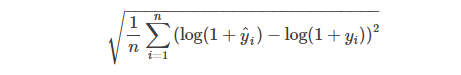

>**Machine Learning algorithms for regression:** 
- Linear Regression
- K-Nearest Neighbors
- Decision Trees
- Support Vector Machine
- Random Forest
- AdaBoost
- Gradient Boost
- XGBoost
- ...


> **Application:** This predictive capability can be used to estimate the age of new abalones for various purposes, such as population studies, conservation efforts, or commercial applications.

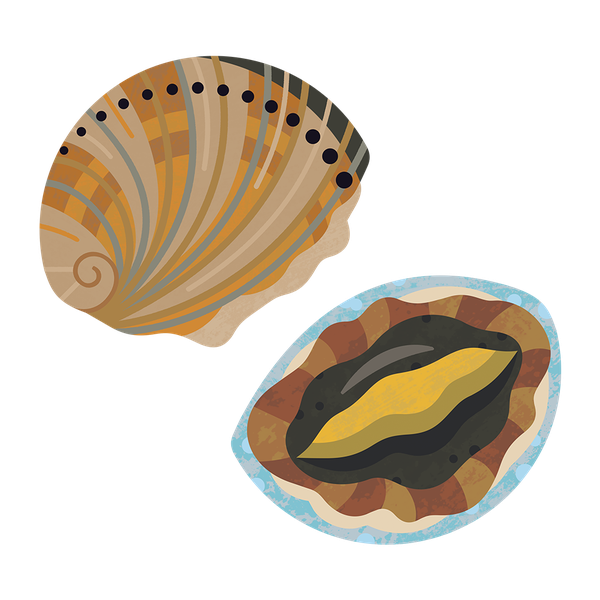

## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_log_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Import the Dataset

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df_train = pd.read_csv("/kaggle/input/playground-series-s4e4/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv")

## Data Preprocessing

In [4]:
print(f"train data shape: {df_train.shape}")
print(f"test data shape: {df_test.shape}")

train data shape: (90615, 10)
test data shape: (60411, 9)


In [5]:
df_train.head(5)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [6]:
df_test.head(5)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


> **Note: We need to check for missing data.**

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


> Great! No mssing data in both train and test data.**

## Features Encoding

>**Note: As you notice, the column "Sex" has categorical data. We need to encode it so that we can use it in our ML model.**

In [9]:
df_train["Sex"].unique()

array(['F', 'I', 'M'], dtype=object)

In [10]:
df_train['Sex'] = df_train['Sex'].map({'F': 0, 'I': 1, 'M': 2})
df_test['Sex'] = df_test['Sex'].map({'F': 0, 'I': 1, 'M': 2})

## Features Correlation

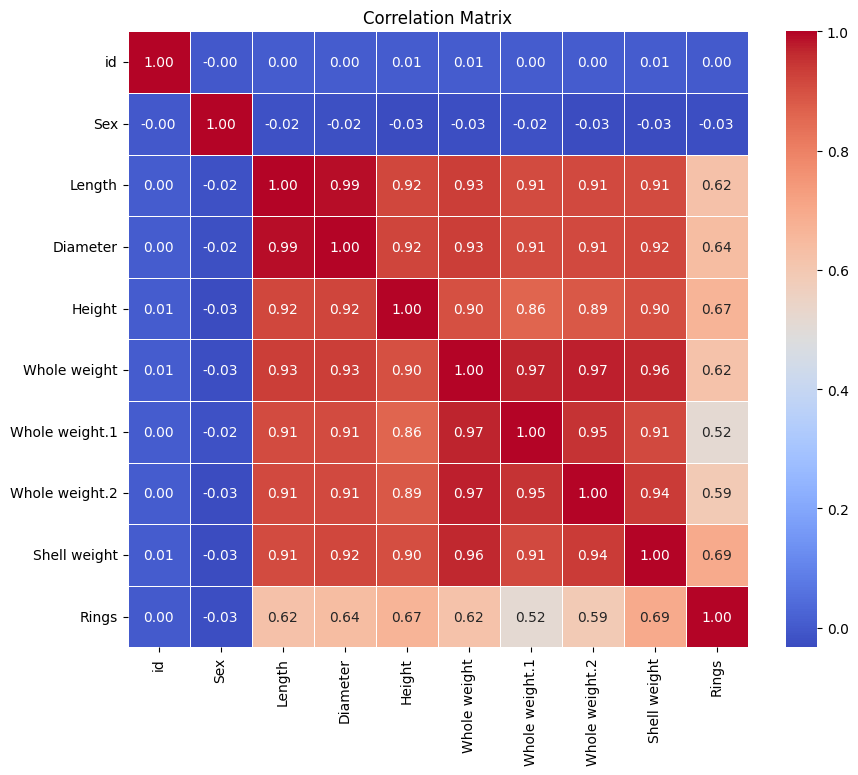

In [11]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
matrix_corr = correlation_matrix['Rings'].drop('Rings')
max_corr_feat = matrix_corr.abs().idxmax()
max_corr_val = matrix_corr.abs().max()
print(f"The feature with the highest correlation with 'Rings' is '{max_corr_feat}' with a correlation value of {max_corr_val.round(4)}.")

The feature with the highest correlation with 'Rings' is 'Shell weight' with a correlation value of 0.6948.


> Drop the column "ID" from the train data since it is not important for our prediction.

In [13]:
df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)

## Check for Outliers

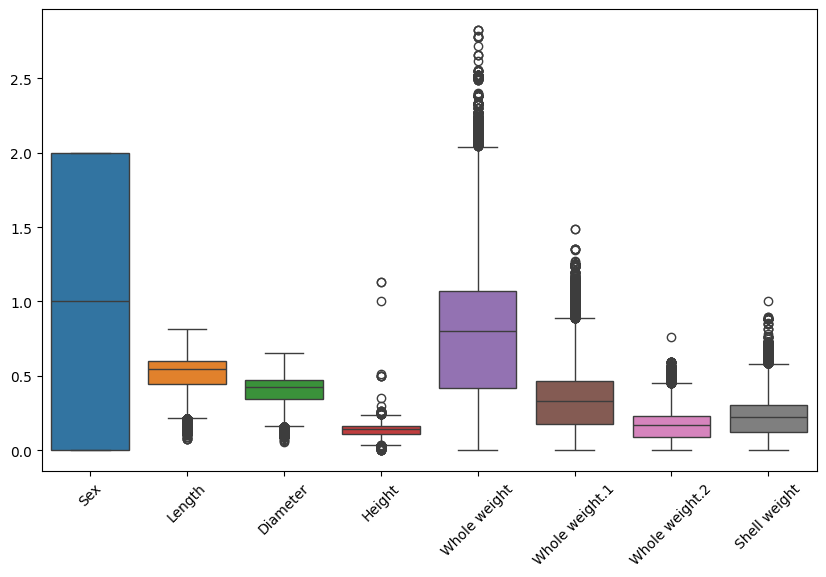

In [14]:
# check for outliers in the train data.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train.drop('Rings', axis=1))
plt.xticks(rotation=45)
plt.show()

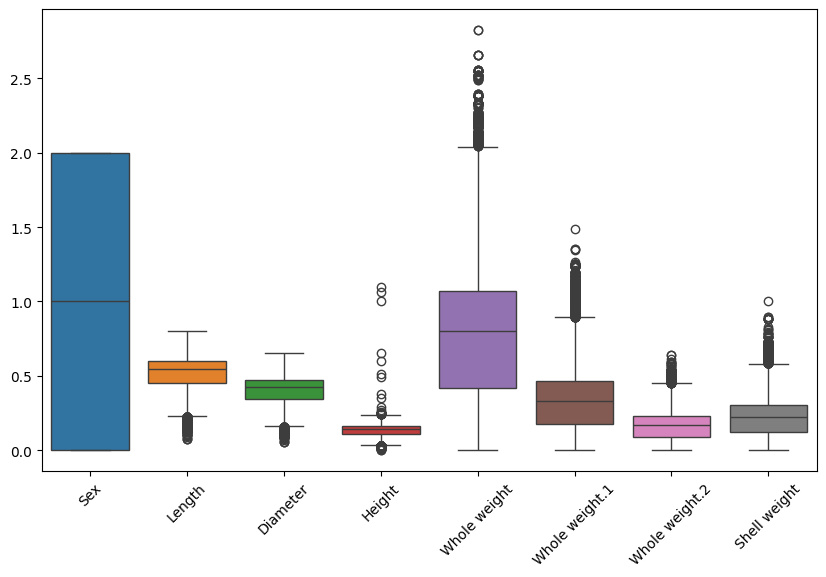

In [15]:
# check for outliers in the train data.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test)
plt.xticks(rotation=45)
plt.show()

>Both train and test data contain the same outliers generally. So we can keep the outliers in the train data (otherwise we will have to remove them from the test data).

## Data split

>We separate the train data into train and test to evaluate the model.

The test data will not be used while evaluating the model. we will use it once we find the best model to make our final predictions.

In [16]:
X = df_train.drop('Rings', axis=1)
y = df_train['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression Model

In [17]:
lin_reg = LinearRegression()
# train the model
lin_reg.fit(X_train, y_train)
# test the model

y_pred_lin = np.abs(lin_reg.predict(X_test))

#evaluate the model using rmsle

rmsle_lin_test = root_mean_squared_log_error(y_test, y_pred_lin)

rmsle_lin_test

0.16479158587687423

## K-Nearest Neighbors Model

In [18]:
# train the model
knn_reg = KNeighborsRegressor(n_neighbors=5) # random k value.

knn_reg.fit(X_train, y_train)

y_pred_knn = np.abs(knn_reg.predict(X_test))
rmsle_knn = root_mean_squared_log_error(y_test, y_pred_knn)
rmsle_knn

0.1639100688835124

In [19]:
# Hyperparameter Tuning
knn_reg = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [50,51,52,53,55,58], 
    'weights': ['uniform', 'distance'] 
}


rmsle_scorer = make_scorer(root_mean_squared_log_error)

grid_search = GridSearchCV(knn_reg, param_grid, scoring=rmsle_scorer, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rmsle_train = grid_search.best_score_  

print("Best parameters:", best_params)
print("Best trained RMSLE:", best_rmsle_train)


best_knn_reg = KNeighborsRegressor(**best_params)
best_knn_reg.fit(X_train, y_train)

y_pred_best_knn = np.abs(best_knn_reg.predict(X_test))
best_rmsle_test = root_mean_squared_log_error(y_test, y_pred_best_knn)
print("Best tested RMSLE:", best_rmsle_test)


Best parameters: {'n_neighbors': 55, 'weights': 'uniform'}
Best trained RMSLE: 0.15327902204117116
Best tested RMSLE: 0.15329032706075862


> **Conclusion:** In order to use KNN regressor, we need to set k = 55 and weights = 'uniform'

In [20]:
# train the model again
knn_reg = KNeighborsRegressor(n_neighbors=55, weights='uniform') # random k value.

knn_reg.fit(X_train, y_train)

y_pred_knn = np.abs(knn_reg.predict(X_test))
rmsle_knn_test = root_mean_squared_log_error(y_test, y_pred_knn)
print(f' KNN test RMSLE: {rmsle_knn_test}')

 KNN test RMSLE: 0.15329032706075862


## Support Vector Machine (SVM) Model

**Linear SVM**

In [21]:
linear_svc_reg = make_pipeline(StandardScaler(), LinearSVC(C=.1, random_state=42, dual=False))

# train the model
linear_svc_reg.fit(X_train, y_train)

# Predictions on train set
y_pred_train = linear_svc_reg.predict(X_train)
RMSLE_lin_svm_train = root_mean_squared_log_error(y_train, y_pred_train)

# Predictions on test set
y_pred_lin_svm = linear_svc_reg.predict(X_test)
RMSLE_lin_svm_test = root_mean_squared_log_error(y_test, y_pred_lin_svm)

print(f"Train RMSLE: {RMSLE_lin_svm_train}")
print(f"tEST RMSLE: {RMSLE_lin_svm_test}")

Train RMSLE: 0.19559899196242572
tEST RMSLE: 0.19635312605964442


**Polynomial Features for Linear SVM**

In [22]:
# this cell takes about 17 minutes to run.

polynomial_svm_reg = make_pipeline(
   PolynomialFeatures(degree=3), 
   StandardScaler(),
   LinearSVC(C=1, random_state=42, dual=False)
)

#train the model
polynomial_svm_reg.fit(X_train, y_train)

#Predictions on training data
y_pred_train_poly_svm = polynomial_svm_reg.predict(X_train)
poly_features_train_RMSLE = root_mean_squared_log_error(y_train, y_pred_train_poly_svm)

#Predictions on test data
y_pred_test_poly_svm = polynomial_svm_reg.predict(X_test)
poly_features_test_RMSLE = root_mean_squared_log_error(y_test, y_pred_test_poly_svm)

print(f"Train RMSLE: {poly_features_train_RMSLE}")
print(f"Test RMSLE: {poly_features_test_RMSLE}")


c:\Users\woule\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train RMSLE: 0.1802597098615544
Test RMSLE: 0.1818641079917131


**RBF SVM**

In [23]:
# this cell takes about 15 minutes to run.

RBF_svm_reg = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=.1, C=10)
)

# train the model
RBF_svm_reg.fit(X_train, y_train)

# Predictions on training data
y_pred_train_RBF_svm_reg = RBF_svm_reg.predict(X_train)
train_RBF_svm_reg_RMSLE = root_mean_squared_log_error(y_train, y_pred_train_RBF_svm_reg)

# Predictions on test data
y_pred_test_RBF_svm_reg= RBF_svm_reg.predict(X_test)
test_RBF_svm_reg_RMSLE = root_mean_squared_log_error(y_test, y_pred_test_RBF_svm_reg)

print(f"Train RMSLE: {train_RBF_svm_reg_RMSLE}")
print(f"Test RMSLE: {test_RBF_svm_reg_RMSLE}")

Train RMSLE: 0.18066202551545657
Test RMSLE: 0.1815064192084037


**Polynomial Kernel**

In [24]:
# this cell takes about 20 minutes to run.

poly_kernel_svm_reg = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", coef0=.1 ,C=50)
)
# train the model
poly_kernel_svm_reg.fit(X_train, y_train)

# Predictions on training data
y_pred_train_poly_kernel    = poly_kernel_svm_reg.predict(X_train)
train_poly_kernel_reg_RMSLE = root_mean_squared_log_error(y_train, y_pred_train_poly_kernel )

# Predictions on test data
y_pred_test_poly_kernel    = poly_kernel_svm_reg.predict(X_test)
test_poly_kernel_reg_RMSLE = root_mean_squared_log_error(y_test, y_pred_test_poly_kernel)

print(f"Train RMSLE: {train_poly_kernel_reg_RMSLE}")
print(f"Test RMSLE: {test_poly_kernel_reg_RMSLE}")

Train RMSLE: 0.18042796434974048
Test RMSLE: 0.18095434369287305


## Decision Tree

In [25]:
tree_reg = DecisionTreeRegressor(max_depth=8, random_state=42)

tree_reg.fit(X_train, y_train)
y_pred_tree_train_reg = tree_reg.predict(X_train)
y_pred_tree_test_reg = tree_reg.predict(X_test)

tree_reg_train_RMSLE = root_mean_squared_log_error(y_train, y_pred_tree_train_reg)
tree_reg_test_RMSLE = root_mean_squared_log_error(y_test, y_pred_tree_test_reg)

print(f"Train RMSLE: {tree_reg_train_RMSLE}")
print(f"test RMSLE:{tree_reg_test_RMSLE}")

Train RMSLE: 0.15242626307725868
test RMSLE:0.15881108668693308


## Random Forest

In [26]:
# Initialize the Random Forest Regressor
forest_reg = make_pipeline(RandomForestRegressor(n_estimators=400,
                                                 min_samples_split =13,
                                                 min_samples_leaf=5,
                                                 n_jobs=-1, 
                                                 max_features='log2', 
                                                 max_depth=20,
                                                 random_state=42))

# Train the model
forest_reg.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_forest_train = forest_reg.predict(X_train)
y_pred_forest_test = forest_reg.predict(X_test)

# Calculate RMSLE
forest_train_RMSLE = root_mean_squared_log_error(y_train, y_pred_forest_train)
forest_test_RMSLE = root_mean_squared_log_error(y_test, y_pred_forest_test)

# Print the results
print(f"Train RMSLE: {forest_train_RMSLE}")
print(f"Test RMSLE: {forest_test_RMSLE}")

Train RMSLE: 0.11887887387000882
Test RMSLE: 0.1505714657217672


## AdaBoost

In [27]:
ada_boost = AdaBoostRegressor(RandomForestRegressor(n_estimators=30,
                                                 min_samples_split =13,
                                                 min_samples_leaf=5,
                                                 n_jobs=-1, 
                                                 max_features='log2', 
                                                 max_depth=20,
                                                 random_state=42),learning_rate=0.01, random_state=42)

# Create a pipeline
ada_reg = make_pipeline(StandardScaler(), ada_boost)

# Train the model
ada_reg.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_ada_train = ada_reg.predict(X_train)
y_pred_ada_test = ada_reg.predict(X_test)

# Calculate RMSLE
ada_train_RMSLE = root_mean_squared_log_error(y_train, y_pred_ada_train)
ada_test_RMSLE = root_mean_squared_log_error(y_test, y_pred_ada_test)

# Print the results
print(f"Train RMSLE: {ada_train_RMSLE}")
print(f"Test RMSLE: {ada_test_RMSLE}")



Train RMSLE: 0.12005778168274894
Test RMSLE: 0.150695271604865


## Gradient Boost

In [28]:
# Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(
    n_estimators=1000, 
    learning_rate=0.1, 
    max_depth=5, 
    min_samples_split=13,
    min_samples_leaf=5,
    max_features='log2',
    random_state=42
)

# Create a pipeline
gb_reg_pipeline = make_pipeline(StandardScaler(),gb_reg)

# Train the model
gb_reg_pipeline.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = gb_reg_pipeline .predict(X_train)
y_pred_test = gb_reg_pipeline .predict(X_test)

# Calculate RMSLE
gb_train_rmsle = root_mean_squared_log_error(y_train, y_pred_train)
gb_test_rmsle = root_mean_squared_log_error(y_test, y_pred_test)

# Print the results
print(f"Train RMSLE: {gb_train_rmsle}")
print(f"Test RMSLE: {gb_test_rmsle}")


Train RMSLE: 0.1328290418452806
Test RMSLE: 0.14862855776106404


## XGBoost

In [29]:
# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor(
    n_estimators=870, 
    learning_rate= 0.0658256858323339, 
    max_depth=17, 
    min_child_weight=8,
    gamma= 1.023439163483454,
    subsample=1,
    colsample_bytree=0.7330303238334908,
    objective='reg:squarederror',
    random_state=42,
    reg_alpha = 72.5,
    reg_lambda = 0.7762507002336654
    
)

# Create a pipeline
xgb_reg_pipeline = make_pipeline(StandardScaler(), xgb_reg)

# Train the model
xgb_reg_pipeline.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train_xgb = xgb_reg_pipeline.predict(X_train)
y_pred_test_xgb = xgb_reg_pipeline.predict(X_test)

# Calculate RMSLE
train_rmsle_xgb = root_mean_squared_log_error(y_train, y_pred_train_xgb)
test_rmsle_xgb = root_mean_squared_log_error(y_test, y_pred_test_xgb)

# Print the results
print("XGBoost Results:")
print(f"Train RMSLE: {train_rmsle_xgb}")
print(f"Test RMSLE: {test_rmsle_xgb}")

XGBoost Results:
Train RMSLE: 0.1438131256744344
Test RMSLE: 0.14979454146174417


## Models Comparison

>In this section we will compare the test results of all the models we trained so far, and select the best model for predicting the age of the abalone.

**Compare between all these models**

- test_rmsle_xgb             --> XGBoost
- gb_test_rmsle              --> Gradient Boost
- ada_test_RMSLE             --> AdaBoost
- forest_test_RMSLE          --> Random Forest
- tree_reg_test_RMSLE        --> Decision Tree
- test_poly_kernel_reg_RMSLE --> Polynomial Kernel
- test_RBF_svm_reg_RMSLE     --> RBF Kernel SVM
- RMSLE_lin_svm_test         --> Linear SVM
- rmsle_knn_test             --> KNN
- poly_features_test_RMSLE   --> Polynomial Features
- rmsle_lin_test             --> Linear Regression


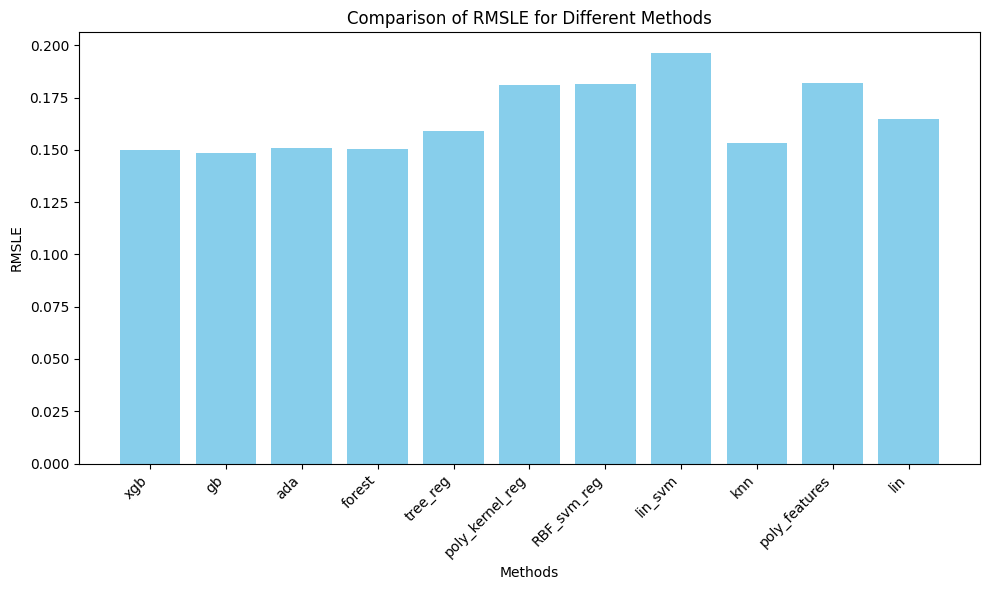

In [30]:
methods = ['xgb', 'gb', 'ada', 'forest', 'tree_reg', 'poly_kernel_reg', 'RBF_svm_reg', 'lin_svm', 'knn', 'poly_features', 'lin']
rmsle_values = [test_rmsle_xgb, 
                gb_test_rmsle,
                ada_test_RMSLE,
                forest_test_RMSLE,
                tree_reg_test_RMSLE,
                test_poly_kernel_reg_RMSLE,
                test_RBF_svm_reg_RMSLE,
                RMSLE_lin_svm_test,
                rmsle_knn_test,
                poly_features_test_RMSLE,
                rmsle_lin_test]

plt.figure(figsize=(10, 6))
plt.bar(methods, rmsle_values, color='skyblue')
plt.xlabel('Methods')
plt.ylabel('RMSLE')
plt.title('Comparison of RMSLE for Different Methods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
best_method = methods[rmsle_values.index(min(rmsle_values))]

best_RMSLE_Reg = min(rmsle_values)

print("Best method for RMSLE: ", best_method)
print("Best RMSLE value: ", best_RMSLE_Reg)

Best method for RMSLE:  gb
Best RMSLE value:  0.14862855776106404


## Making Predictions on Test Data

in this section we will make predictions on the final test data using the best model we found so far (Gradient Boosting Regressor).

In [34]:
# Re-train the model on the entire training data
gb_reg_pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=5, max_features='log2',
                                           min_samples_leaf=5,
                                           min_samples_split=13,
                                           n_estimators=1000,
                                           random_state=42))])

In [36]:
y_pred = gb_reg_pipeline.predict(df_test)
y_pred

array([ 9.83811789,  9.76521233, 10.14844054, ..., 12.88731561,
       13.09525353,  8.65418665])

In [37]:
# Save the predictions to a CSV file
y_pred = np.round(y_pred).astype(int) 
indices = np.arange(90615, 90615 + len(y_pred))
results_df = pd.DataFrame({
    'id': indices,
    'Rings': y_pred
})
results_df.to_csv('abalone_age_prediction.csv', index=False)